In [3]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1324 sha256=7f02a46f3df986b102796af1ccdb100421c04b7f631cd756f6b39b9a76955716
  Stored in directory: C:\Users\asiddiqui\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Classfication

In [1]:
#imports
#numpy, pandas, math, math plotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

# Import File and Change Data Type

In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1, dtype={
                     'SEX': 'category',
                     'EDUCATION': 'category',
                     'MARRIAGE': 'category',
                     'PAY_0': 'category',
                     'PAY_2': 'category',
                     'PAY_3': 'category',
                     'PAY_4': 'category',
                     'PAY_5': 'category',
                     'PAY_6': 'category',
                    'default payment next month': 'category'} )
rawData.head()

rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int

# Covariance Estimation

In [66]:
!pip install matplotlib==3.1.0

  Found existing installation: matplotlib 2.2.2
    Uninstalling matplotlib-2.2.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\program files (x86)\\microsoft visual studio\\shared\\anaconda3_64\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


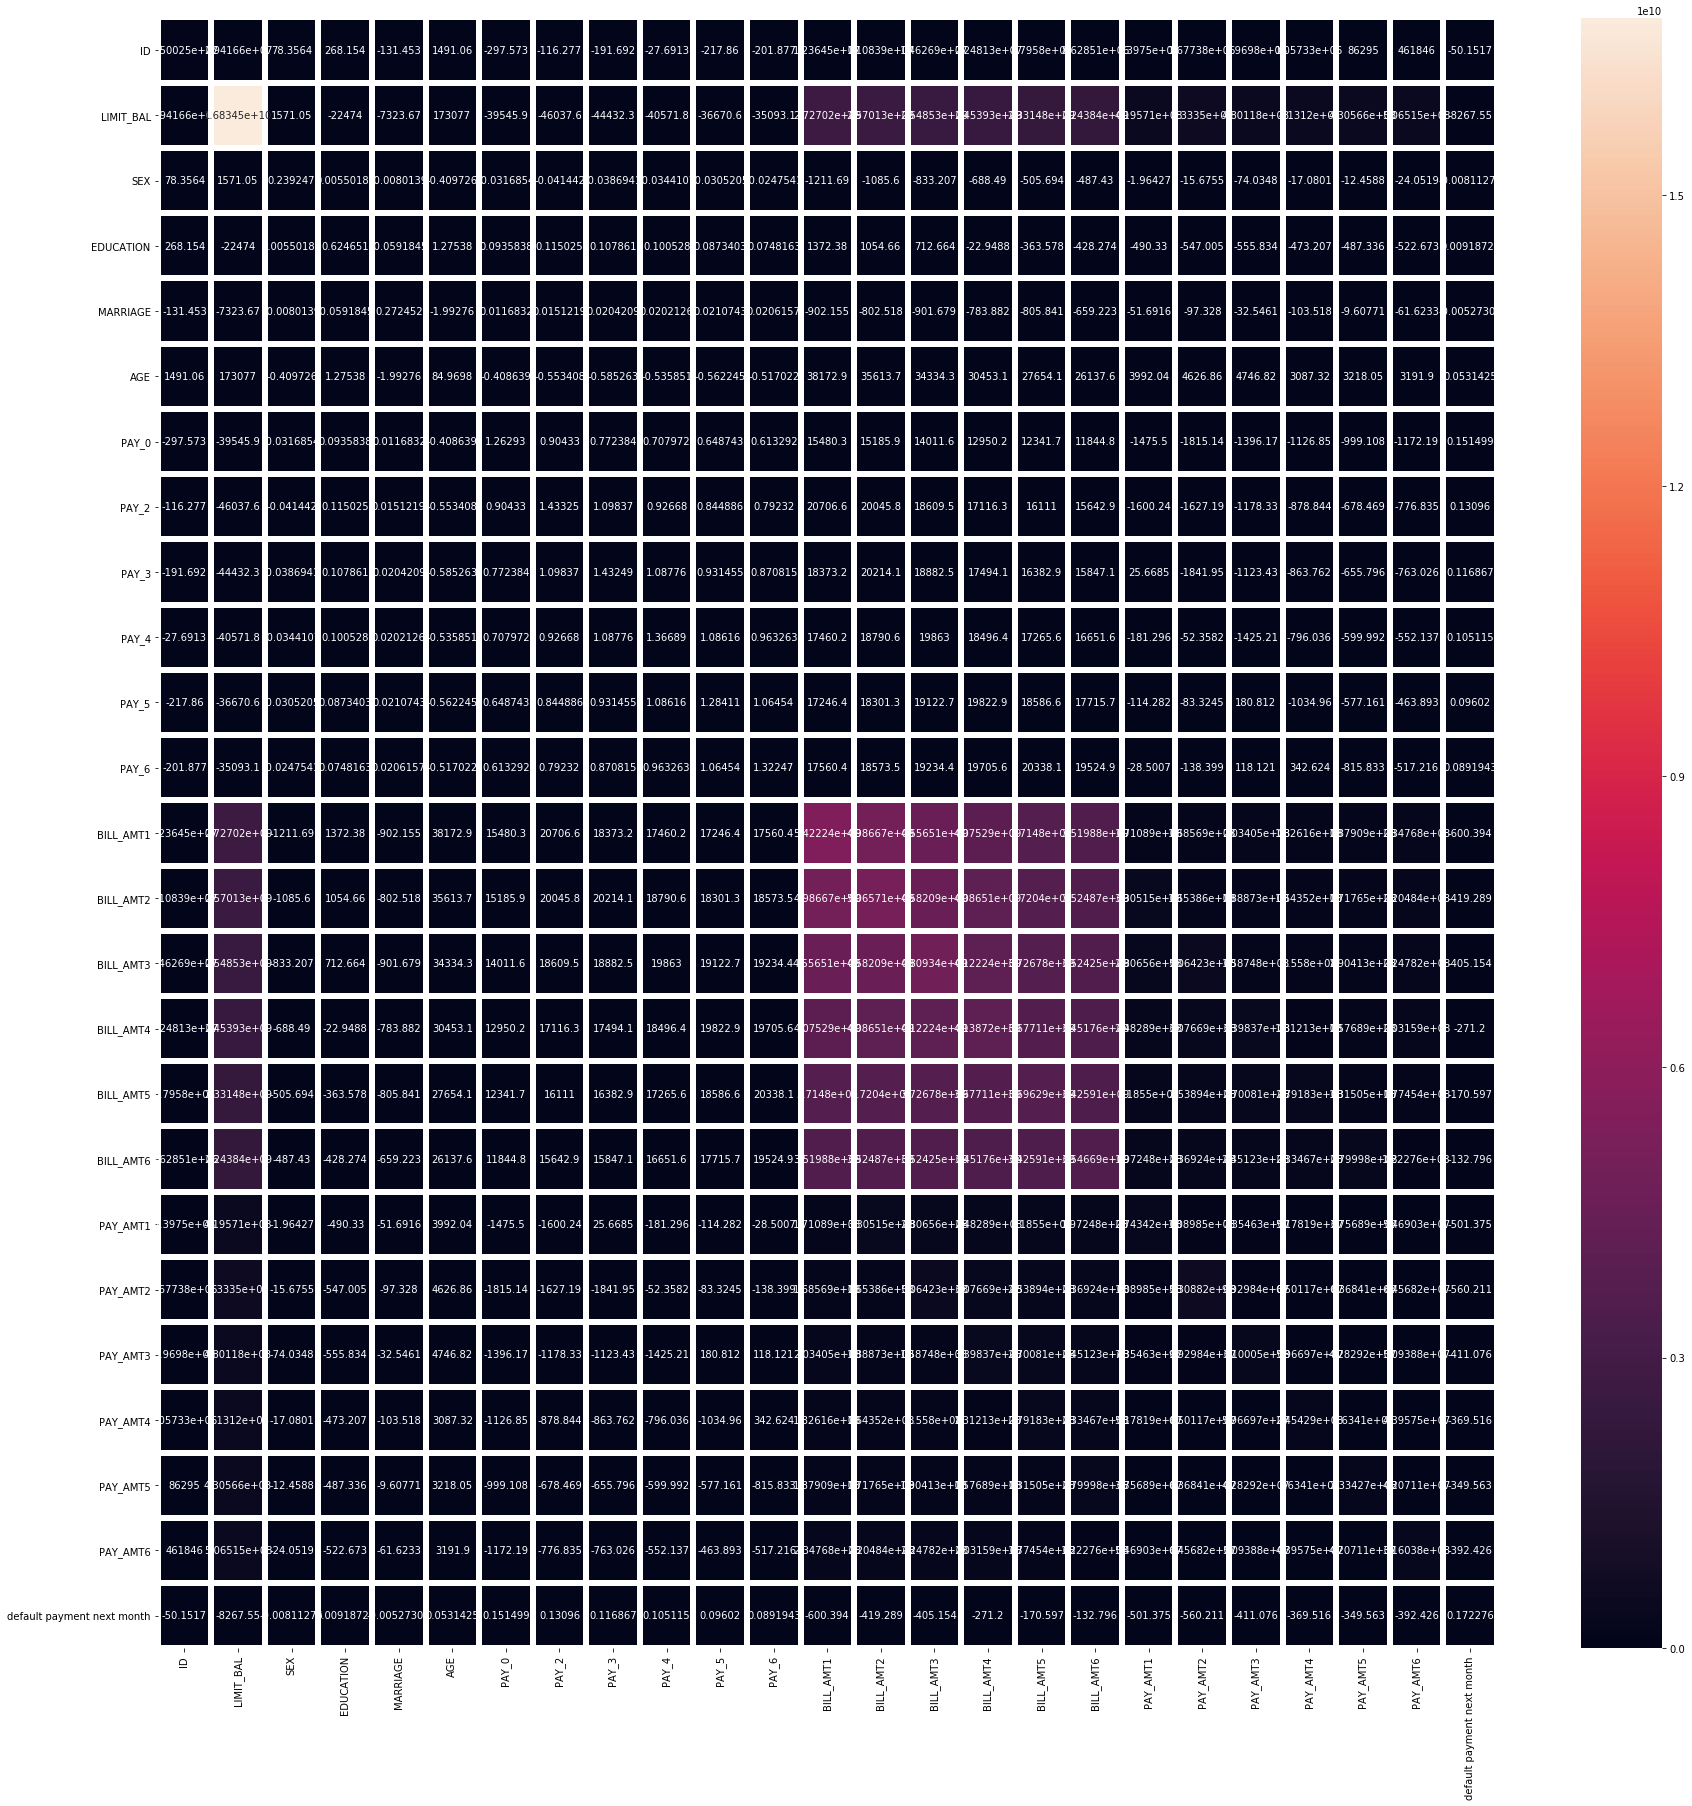

In [82]:
 testdf = pd.read_csv('default of credit card clients.csv', header=1)

covMatrix = testdf.cov()
fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(covMatrix, annot=True, fmt='g', linewidths=5, ax=ax)
plt.show()

# EDA

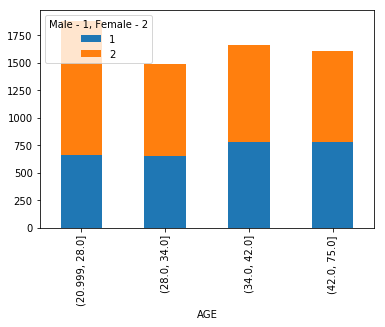

In [92]:
# PSex and agegroups by default and non default

defaulted = testdf[testdf['default payment next month']==1]
credittable2 = pd.crosstab(index=[pd.qcut(defaulted['AGE'], q=4)
                                 ], columns=[defaulted.SEX])
credittable2.unstack()
credittable2

credittable2.plot.bar(stacked=True)
plt.legend(title='Male - 1, Female - 2')

plt.show()

default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64


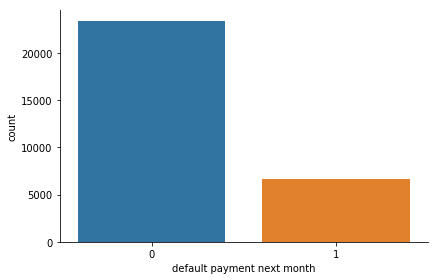

In [94]:
# How many are defaulted and not Defaulted for Next Month?
print(testdf.groupby(['default payment next month'])['default payment next month'].count())
sns.factorplot('default payment next month', data=testdf, kind='count', aspect=1.5)
# 6636 will be default and 23364 not default


In [19]:
##--------Classification-----------##

#features
#Remove ID Feature
RevisedDataset = rawData.iloc[:,1:25]
print('Summary of feature sample')
RevisedDataset.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
Corr_matrix = RevisedDataset.corr()
print(Corr_matrix)

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  0.047613   0.802650   0.831594   0.853320   0.900941   
PAY_AMT1    0.195236  0.026147   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011   0.300023   
PAY_AMT4    0.203242  0.021379   0.158303   0.147398   0.143405 

In [21]:
#features
#Remove ID Feature
featuresClass = rawData.iloc[:,1:24]
print('Summary of feature sample')
featuresClass.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
#dependent variable
#depVarClass = rawData.iloc[:,24:25]

depVarClass = rawData['default payment next month']
print(depVarClass)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, object): [0, 1]


In [23]:
featuresClass.shape

(30000, 23)

In [24]:
depVarClass.shape

(30000,)

# Seperating Dependant and Independent variables

In [25]:
##OOB##

OOB = featuresClass
OOBdepvar = depVarClass
print(OOB.head)

<bound method NDFrame.head of        LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
0          20000   2         2        1   24     2     2    -1    -1    -2   
1         120000   2         2        2   26    -1     2     0     0     0   
2          90000   2         2        2   34     0     0     0     0     0   
3          50000   2         2        1   37     0     0     0     0     0   
4          50000   1         2        1   57    -1     0    -1     0     0   
5          50000   1         1        2   37     0     0     0     0     0   
6         500000   1         1        2   29     0     0     0     0     0   
7         100000   2         2        2   23     0    -1    -1     0     0   
8         140000   2         3        1   28     0     0     2     0     0   
9          20000   1         3        2   35    -2    -2    -2    -2    -1   
10        200000   2         3        2   34     0     0     2     0     0   
11        260000   2         1    

# Feature Selection Remove Correlation

# Create Dummy Variables for Category Data

In [26]:
#Create Dummy variables for the categorical fields
OOB = pd.get_dummies(OOB)
OOB.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,1,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [28]:
OOB.shape

(30000, 91)

In [29]:
OOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 91 columns):
LIMIT_BAL      30000 non-null int64
AGE            30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
SEX_1          30000 non-null uint8
SEX_2          30000 non-null uint8
EDUCATION_0    30000 non-null uint8
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
EDUCATION_4    30000 non-null uint8
EDUCATION_5    30000 non-null uint8
EDUCATION_6    30000 non-null uint8
MARRIAGE_0     30000 non-null uint8
MARRIAGE_1     30000 non-nu

In [19]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(OOB)
OOB = pd.DataFrame(x_scaled)
OOB.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [166]:
OOB.cov()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,0.017176,0.003014,2.437472e-03,2.463767e-03,1.413387e-03,2.334915e-03,2.335171e-03,1.741766e-03,4.851563e-04,3.198664e-04,...,0.007242,0.006235,-0.006647,-0.005835,-5.669251e-04,-1.786838e-04,-2.617246e-05,-5.159102e-05,-1.647960e-04,-6.901531e-06
1,0.003014,0.025259,5.823903e-04,5.827313e-04,3.250165e-04,4.945936e-04,4.727733e-04,3.463156e-04,7.879131e-05,4.736414e-05,...,0.002506,0.002241,-0.003752,-0.000897,-1.174361e-04,-2.114410e-05,1.545166e-06,-1.622152e-05,5.210921e-05,3.465058e-06
2,0.002437,0.000582,4.245725e-03,4.187714e-03,2.213731e-03,3.396953e-03,3.259443e-03,2.393578e-03,1.733089e-04,8.856372e-05,...,-0.005862,-0.005295,0.011351,0.000004,-8.924053e-05,-3.291347e-05,-2.494375e-06,-6.108216e-06,-6.663601e-05,-8.080640e-07
3,0.002464,0.000583,4.187714e-03,4.562463e-03,2.387530e-03,3.653229e-03,3.500994e-03,2.570728e-03,3.590721e-04,9.319001e-05,...,-0.006307,-0.005897,0.012189,0.000198,-7.986327e-05,-3.051405e-05,-8.853152e-07,-3.804483e-06,-6.848999e-05,-1.739044e-07
4,0.001413,0.000325,2.213731e-03,2.387530e-03,1.449763e-03,2.131983e-03,2.028905e-03,1.486982e-03,1.763974e-04,1.650859e-04,...,-0.003552,-0.003481,0.006883,0.000238,-3.744205e-05,-1.440125e-05,1.836278e-06,-7.811842e-07,-3.780007e-05,-4.786546e-08
5,0.002335,0.000495,3.396953e-03,3.653229e-03,2.131983e-03,3.672445e-03,3.434573e-03,2.498730e-03,2.677400e-04,1.720755e-04,...,-0.005924,-0.005873,0.011178,0.000726,-3.916719e-05,-1.672178e-05,5.114771e-06,1.983136e-06,-5.943631e-05,3.914746e-07
6,0.002335,0.000473,3.259443e-03,3.500994e-03,2.028905e-03,3.434573e-03,3.634213e-03,2.610550e-03,2.480757e-04,1.494737e-04,...,-0.006171,-0.006097,0.011228,0.001111,-1.625839e-05,-1.111176e-05,7.287326e-06,6.163202e-06,-5.807696e-05,8.878189e-07
7,0.001742,0.000346,2.393578e-03,2.570728e-03,1.486982e-03,2.498730e-03,2.610550e-03,2.094549e-03,1.735229e-04,1.081022e-04,...,-0.004368,-0.004565,0.008084,0.000894,-8.347910e-06,-6.585859e-06,6.051230e-06,6.182272e-06,-4.331423e-05,7.218457e-07
8,0.000485,0.000079,1.733089e-04,3.590721e-04,1.763974e-04,2.677400e-04,2.480757e-04,1.735229e-04,3.595135e-04,7.407448e-05,...,0.000097,-0.000357,0.000534,-0.000227,-2.775958e-05,-7.150717e-06,-1.085701e-06,-1.620489e-06,-9.939625e-06,3.309526e-07
9,0.000320,0.000047,8.856372e-05,9.319001e-05,1.650859e-04,1.720755e-04,1.494737e-04,1.081022e-04,7.407448e-05,1.871458e-04,...,0.000126,-0.000217,0.000259,-0.000143,-1.612057e-05,-3.523903e-06,9.846374e-07,-1.159007e-06,-5.390750e-06,-2.343805e-07


#  Training & Testing  - Cross Validation

In [107]:
##OOB
from sklearn.model_selection import train_test_split

X_train_OOB, X_test_OOB, y_train_OOB, y_test_OOB = train_test_split(OOB, OOBdepvar,test_size=0.30, random_state=1,stratify=OOBdepvar)

In [31]:
X_train_OOB.shape

(21000, 91)

In [32]:
OOB.head

<bound method NDFrame.head of        LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0          20000   24       3913       3102        689          0          0   
1         120000   26       2682       1725       2682       3272       3455   
2          90000   34      29239      14027      13559      14331      14948   
3          50000   37      46990      48233      49291      28314      28959   
4          50000   57       8617       5670      35835      20940      19146   
5          50000   37      64400      57069      57608      19394      19619   
6         500000   29     367965     412023     445007     542653     483003   
7         100000   23      11876        380        601        221       -159   
8         140000   28      11285      14096      12108      12211      11793   
9          20000   35          0          0          0          0      13007   
10        200000   34      11073       9787       5535       2513       1828   
11        

In [33]:
y_train_OOB.shape

(21000,)

In [34]:
X_test_OOB.shape

(9000, 91)

In [35]:
y_test_OOB.shape

(9000,)

# Model Selection - OOB

# Model: SVC

In [36]:
#Models
from sklearn.svm import LinearSVC


#LinearSVC().get_params()

In [97]:
#Model Fitting SVC - Default
modelLSVC = LinearSVC()
modelLSVC.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelLSVC, X_train_OOB, y_train_OOB.values.ravel(),cv=3))
modelLSVC.score(X_train_OOB,y_train_OOB)

Dep_pred = modelLSVC.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelLSVC, X_train_OOB, y_train_OOB.values.ravel()))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.77742857 0.76042857 0.369     ]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program F

[0.60285714 0.50380952 0.63333333 0.50714286 0.59666667]
Test set accuracy: 0.42
              precision    recall  f1-score   support

           0       0.77      0.36      0.49      7009
           1       0.21      0.61      0.32      1991

    accuracy                           0.42      9000
   macro avg       0.49      0.49      0.41      9000
weighted avg       0.65      0.42      0.45      9000



In [96]:
#Model Fitting SVC, max iter = 2
modelLSVC2 = LinearSVC(max_iter = 2)
modelLSVC2.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelLSVC2, X_train_OOB, y_train_OOB,cv=3))
modelLSVC2.score(X_train_OOB,y_train_OOB)

Dep_pred = modelLSVC2.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelLSVC2, X_train_OOB, y_train_OOB))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program F

[0.77742857 0.77857143 0.74614286]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.73738095 0.77833333 0.775      0.72904762 0.77880952]
Test set accuracy: 0.71
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      7009
           1       0.35      0.36      0.35      1991

    accuracy                           0.71      9000
   macro avg       0.58      0.59      0.58      9000
weighted avg       0.71      0.71      0.71      9000



In [95]:
#Model Fitting Linear SVC, max iter = 4
modelLSVC4 = LinearSVC(max_iter = 4)
modelLSVC4.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelLSVC4, X_train_OOB, y_train_OOB,cv=3))
modelLSVC4.score(X_train_OOB,y_train_OOB)

Dep_pred = modelLSVC4.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelLSVC4, X_train_OOB, y_train_OOB))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.761      0.24314286 0.55642857]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program F

[0.76738095 0.76357143 0.60095238 0.77880952 0.76214286]
Test set accuracy: 0.58
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      7009
           1       0.28      0.56      0.37      1991

    accuracy                           0.58      9000
   macro avg       0.55      0.57      0.53      9000
weighted avg       0.70      0.58      0.61      9000



# Model: KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()


In [42]:
#Model Fitting KNN - Default
modelKNN.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelKNN, X_train_OOB, y_train_OOB,cv=3))
modelKNN.score(X_train_OOB,y_train_OOB)

Dep_pred = modelKNN.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelKNN, X_train_OOB, y_train_OOB))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

[0.75328571 0.75928571 0.74571429]
[0.75214286 0.74785714 0.76190476 0.75285714 0.74809524]
Test set accuracy: 0.75
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      7009
           1       0.39      0.18      0.25      1991

    accuracy                           0.75      9000
   macro avg       0.59      0.55      0.55      9000
weighted avg       0.71      0.75      0.72      9000



In [195]:
#KNN Neighbors 3
modelKNN3 = KNeighborsClassifier(n_neighbors=3)
modelKNN3.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelKNN3, X_train_OOB, y_train_OOB,cv=3))
modelKNN3.score(X_train_OOB,y_train_OOB)

Dep_pred = modelKNN3.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelKNN3, X_train_OOB, y_train_OOB))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

[0.94928571 0.95028571 0.95314286]
[0.95095238 0.95071429 0.95190476 0.95738095 0.95428571]
Test set accuracy: 0.96
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      7009
        True       0.96      0.88      0.91      1991

    accuracy                           0.96      9000
   macro avg       0.96      0.93      0.95      9000
weighted avg       0.96      0.96      0.96      9000



In [197]:
#KNN Neighbors 5
modelKNN5 = KNeighborsClassifier(n_neighbors=5)
modelKNN5.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelKNN5, X_train_OOB, y_train_OOB,cv=3))
modelKNN5.score(X_train_OOB,y_train_OOB)

Dep_pred = modelKNN5.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelKNN5, X_train_OOB, y_train_OOB))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

[0.94471429 0.94885714 0.94757143]
[0.94928571 0.9452381  0.95261905 0.95142857 0.94928571]
Test set accuracy: 0.96
              precision    recall  f1-score   support

       False       0.96      0.99      0.98      7009
        True       0.97      0.85      0.91      1991

    accuracy                           0.96      9000
   macro avg       0.96      0.92      0.94      9000
weighted avg       0.96      0.96      0.96      9000



# Model: Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
modelRF = RandomForestClassifier()


#Model Fitting Decision Tree
modelRF.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelRF, X_train_OOB, y_train_OOB,cv=10))
modelRF.score(X_train_OOB,y_train_OOB)

Dep_pred = modelRF.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelRF, X_train_OOB, y_train_OOB,cv=10))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

[0.81571429 0.8052381  0.81857143 0.81952381 0.81285714 0.81761905
 0.82619048 0.81571429 0.80619048 0.81      ]
[0.80857143 0.8047619  0.81857143 0.81571429 0.81666667 0.81666667
 0.82428571 0.81428571 0.80666667 0.81666667]
Test set accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [53]:
#RF 120 Trees
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators = 120)


#Model Fitting Decision Tree
modelRF.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelRF, X_train_OOB, y_train_OOB,cv=3))
modelRF.score(X_train_OOB,y_train_OOB)

Dep_pred = modelRF.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelRF, X_train_OOB, y_train_OOB,cv=3))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

[0.81085714 0.82057143 0.81285714]
[0.81057143 0.81942857 0.81085714]
Test set accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



In [59]:
#RF 80 trees
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators = 80)


#Model Fitting Decision Tree
modelRF.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelRF, X_train_OOB, y_train_OOB,cv=10))
modelRF.score(X_train_OOB,y_train_OOB)

Dep_pred = modelRF.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelRF, X_train_OOB, y_train_OOB,cv=10))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

[0.81       0.80714286 0.81714286 0.81380952 0.81809524 0.81571429
 0.82904762 0.81380952 0.81238095 0.81761905]
[0.81190476 0.80619048 0.8147619  0.80619048 0.8147619  0.82095238
 0.82285714 0.81380952 0.80809524 0.81380952]
Test set accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [58]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators = 50)


#Model Fitting Decision Tree
modelRF.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelRF, X_train_OOB, y_train_OOB,cv=10))
modelRF.score(X_train_OOB,y_train_OOB)

Dep_pred = modelRF.predict(X_test_OOB)
acc = accuracy_score(y_test_OOB, Dep_pred)
print(cross_val_score(modelRF, X_train_OOB, y_train_OOB,cv=10))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test_OOB, Dep_pred))

[0.81095238 0.8052381  0.81761905 0.81190476 0.81190476 0.81666667
 0.82952381 0.81666667 0.80952381 0.80857143]
[0.8152381  0.80190476 0.81571429 0.81142857 0.82047619 0.8152381
 0.83190476 0.81380952 0.8052381  0.81190476]
Test set accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.38      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [108]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#RFE RF
DT = RandomForestClassifier(n_estimators = 100)

rfe = RFE(DT)

rfe.fit(X_train_OOB, y_train_OOB)

print(np.mean(cross_val_score(rfe, X_train_OOB, y_train_OOB, cv=3)))

y_pred = rfe.predict(X_test_OOB)
acc6 = accuracy_score(y_test_OOB, y_pred)
print("Test set accuracy: {:.2f}".format(acc6))


print(classification_report(y_test_OOB, y_pred))


0.8139047619047619
Test set accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



# Decision Tree RFE

# Feature Selection - RFE

In [45]:
print(ranking)

NameError: name 'ranking' is not defined

# Selected Model RF

In [109]:
#y_test_OOB
X_test_OOB
PredSample = X_test_OOB
PredSample['y'] = y_test_OOB
PredSample['Pred'] = y_pred
#print(PredSample)
PredSample

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,y,Pred
14724,70000,55,53214,54571,42413,42946,43843,44714,2230,2004,...,1,0,0,0,0,0,0,0,0,0
15704,500000,53,17362,16666,16666,16666,33923,16666,16666,16666,...,0,1,0,0,0,0,0,0,0,0
481,140000,26,131367,146193,140202,144035,140419,130271,17000,0,...,0,1,0,0,0,0,0,0,1,0
19353,50000,43,30530,41460,21897,23404,0,0,2000,2000,...,0,0,0,0,0,0,0,0,0,0
17042,300000,24,26158,25673,14290,7490,2962,0,5673,7000,...,0,0,0,0,0,0,0,0,0,0
22106,230000,29,4827,5605,7719,7601,12140,16145,2000,3050,...,1,0,0,0,0,0,0,0,0,0
25029,300000,56,282506,281606,261216,156521,120769,110093,20024,20035,...,1,0,0,0,0,0,0,0,0,0
6445,200000,45,15127,1890,3699,367,-1530,4812,1896,3712,...,0,0,0,0,0,0,0,0,1,0
15116,50000,51,48600,49387,49259,30864,16016,13913,1986,1638,...,1,0,0,0,0,0,0,0,0,0
8304,300000,26,277680,281719,284381,155562,158448,162626,12005,10155,...,1,0,0,0,0,0,0,0,0,0


In [106]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

#RFE Knn
modelDT = DecisionTreeClassifier()


rfe = RFE(modelDT, n_features_to_select=5)

rfe.fit(X_train_OOB, y_train_OOB)

print(np.mean(cross_val_score(rfe, X_train_OOB, y_train_OOB, cv=3)))

y_pred = rfe.predict(X_test_OOB)
acc6 = accuracy_score(y_test_OOB, y_pred)
print("Test set accuracy: {:.2f}".format(acc6))

print(classification_report(y_test_OOB, y_pred))

0.6929047619047619


ValueError: X has a different shape than during fitting.